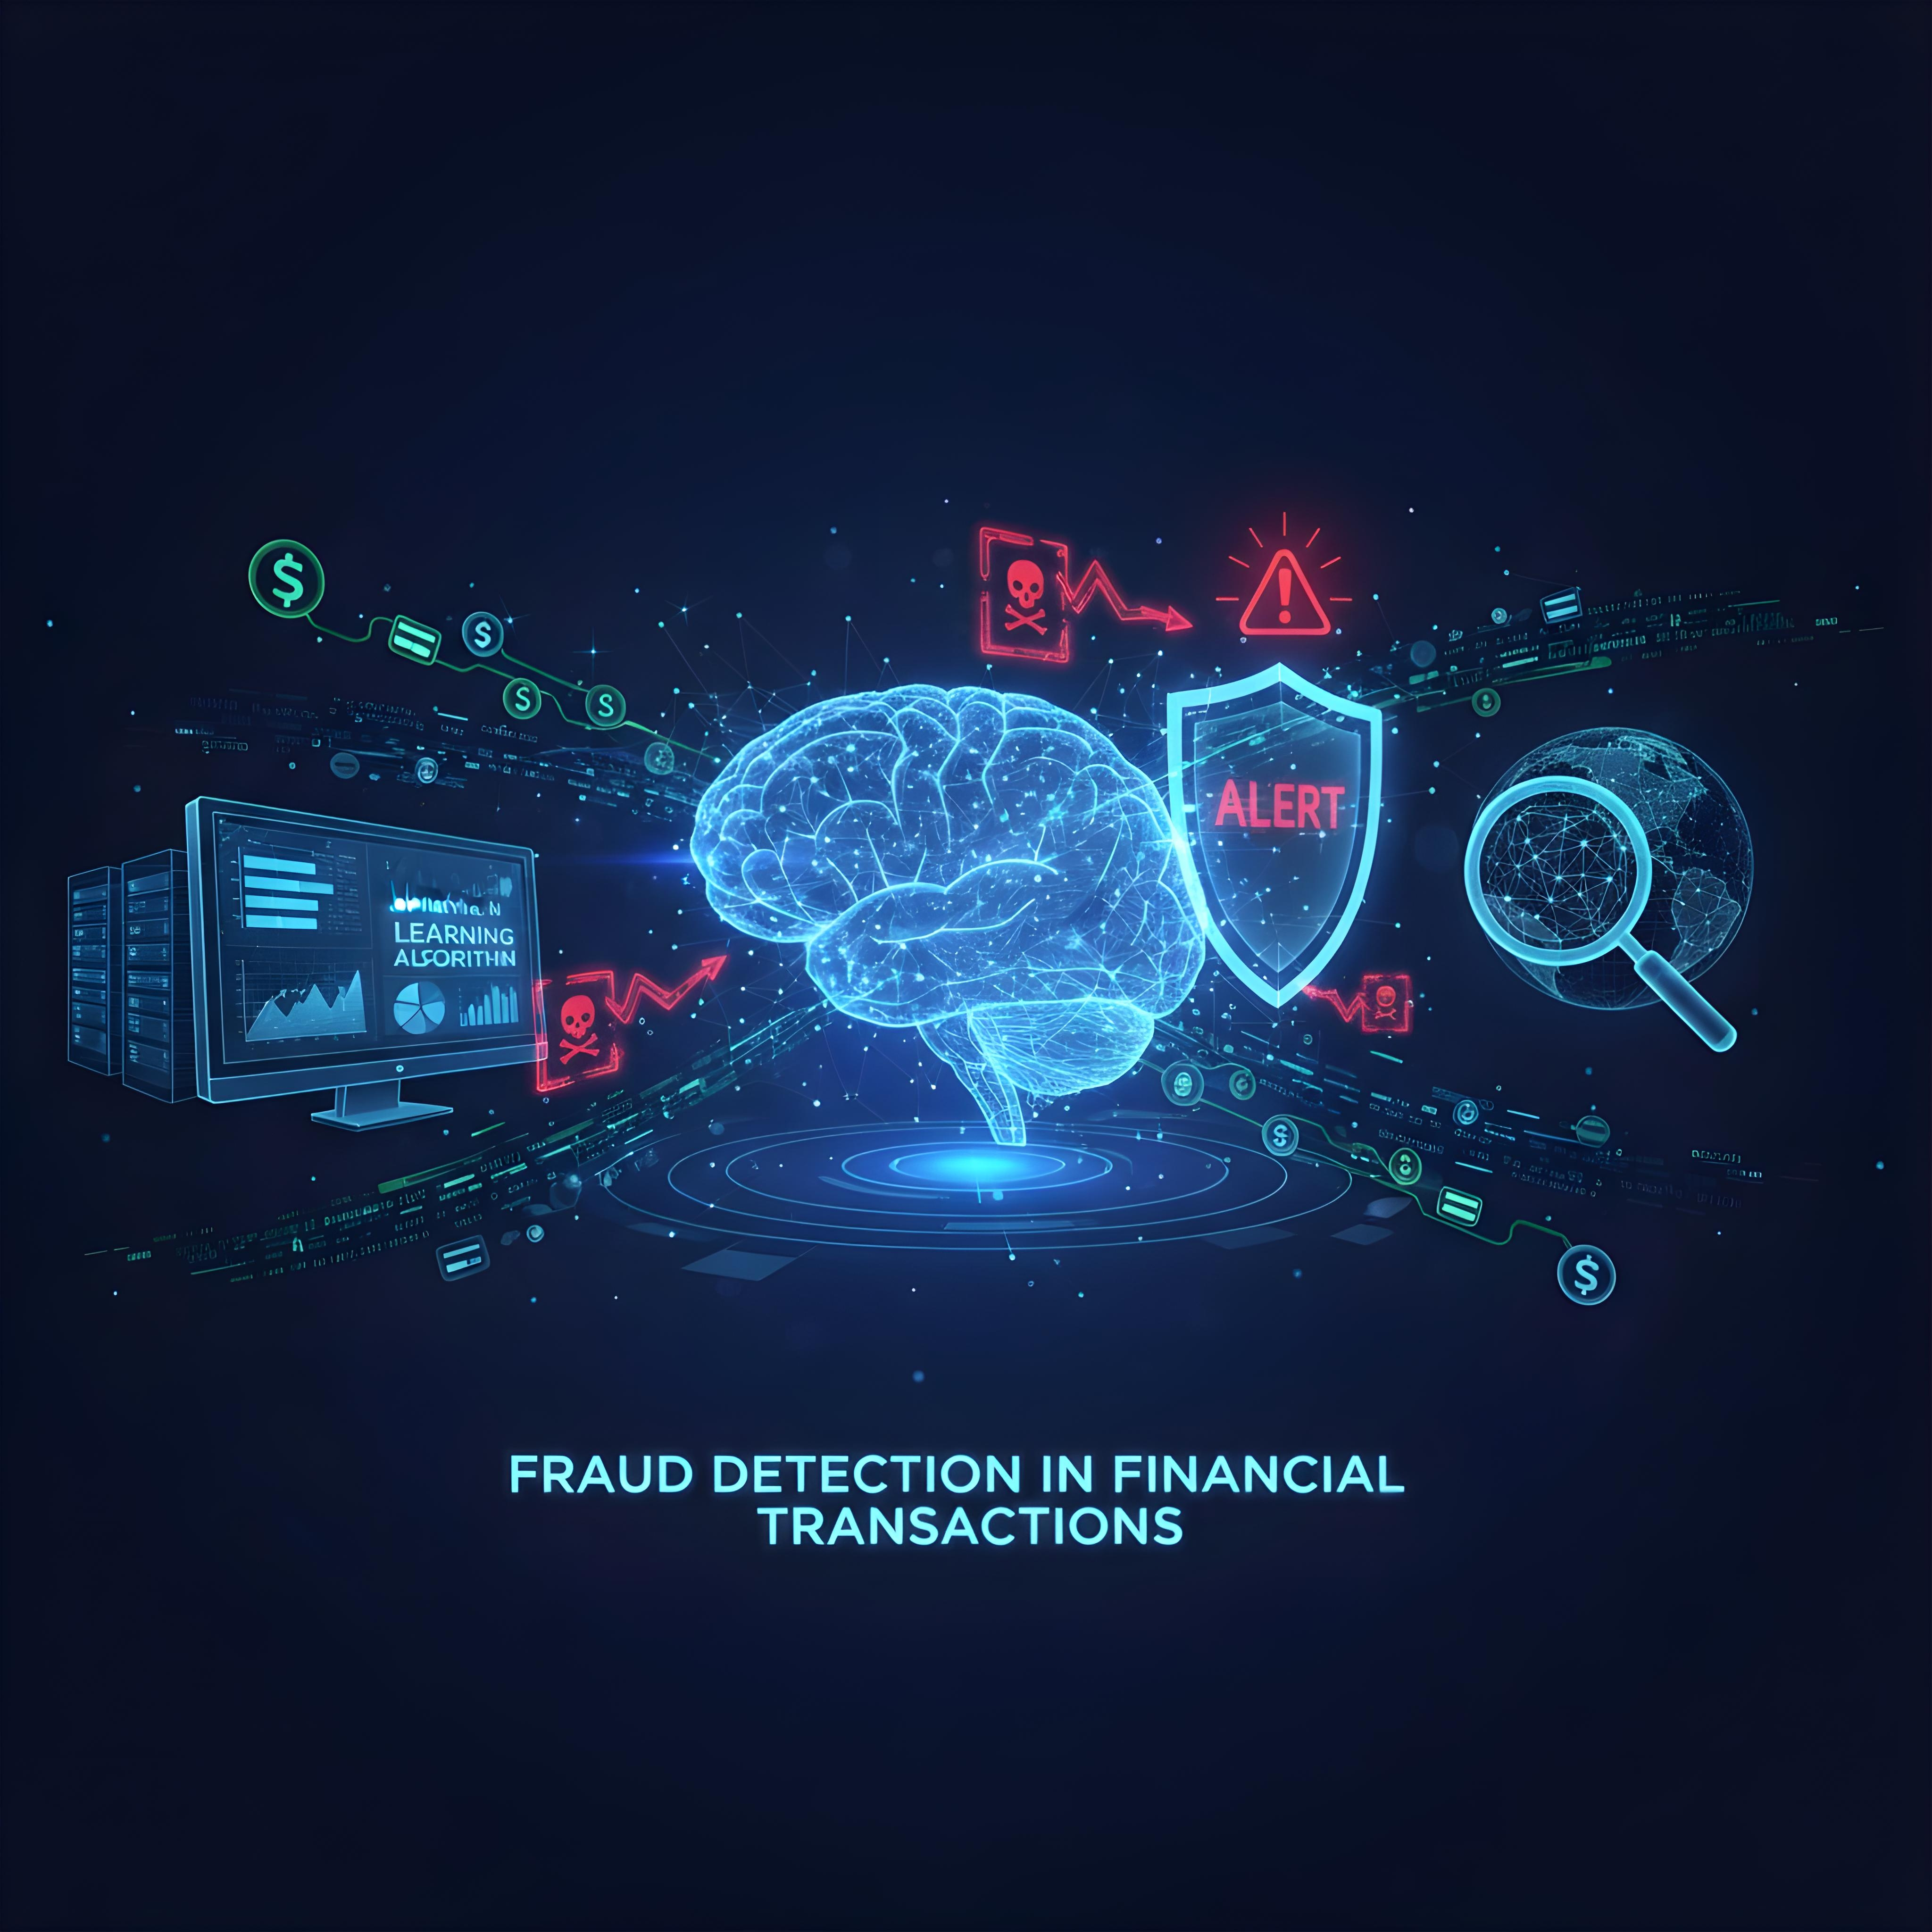

# 🚨 Fraud Detection in Financial Transactions
### Capstone Project - Data Science Course
#### Boston Institute of Analytics, Goregaon, Mumbai

**Student:** [Faizan Qureshi]  
**Instructor:** [Ajeenkya Joshi]  
**Date:** [04/10/2025]

---

## 📋 Table of Contents

1. [Installation of Libraries]
2. [Importing the Libraries]
3. [Loading the Dataset]
4. [Initial Inspection]
5. [Exploratory Data Analysis]
6. [Feature Engineering]
7. [Preprocessing]
8. [Model Evaluation]
9. [Model Performance Analysis]
10. [Financial Impact Analysis]
11. [Business Dashboard]
12. [Model Deployement]
13. [Implementing Genrative AI]
14. [Creating AI Powered System]
15. [Saving AI System For Deployement]

# Step 1: Installation of libraries
    Installed libraries- 1. pandas, 2. numpy,3. scikit-learn,4. matplotlib,5. seaborn ,6. Flask

In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn xgboost

# Step 2: Importing the libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model evaluation metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve)

# Preprocessing and Feature engineering
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

# Data splitting
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

# Step 3: Loading the dataset

In [ ]:
data = pd.read_csv('Fraud_Analysis_Dataset.csv')

# Step 4: Initial Inspection

In [ ]:
print(data.head(10))

   step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER      181.00  C1305486145         181.00             0.0   
1     1  CASH_OUT      181.00   C840083671         181.00             0.0   
2     1  TRANSFER     2806.00  C1420196421        2806.00             0.0   
3     1  CASH_OUT     2806.00  C2101527076        2806.00             0.0   
4     1  TRANSFER    20128.00   C137533655       20128.00             0.0   
5     1  CASH_OUT    20128.00  C1118430673       20128.00             0.0   
6     1  CASH_OUT   416001.33   C749981943           0.00             0.0   
7     1  TRANSFER  1277212.77  C1334405552     1277212.77             0.0   
8     1  CASH_OUT  1277212.77   C467632528     1277212.77             0.0   
9     1  TRANSFER    35063.63  C1364127192       35063.63             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0   C553264065             0.0            0.00        1  
1    C38997010         21182.0      

In [ ]:
print(data.info(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11142 entries, 0 to 11141
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            11142 non-null  int64  
 1   type            11142 non-null  object 
 2   amount          11142 non-null  float64
 3   nameOrig        11142 non-null  object 
 4   oldbalanceOrg   11142 non-null  float64
 5   newbalanceOrig  11142 non-null  float64
 6   nameDest        11142 non-null  object 
 7   oldbalanceDest  11142 non-null  float64
 8   newbalanceDest  11142 non-null  float64
 9   isFraud         11142 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 870.6+ KB
None


In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
data.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  11142.000000  1.114200e+04   1.114200e+04    1.114200e+04   
mean       8.717645  2.131915e+05   9.241173e+05    8.249576e+05   
std       16.067479  7.600650e+05   2.143004e+06    2.089894e+06   
min        1.000000  2.390000e+00   0.000000e+00    0.000000e+00   
25%        2.000000  4.946618e+03   4.270000e+02    0.000000e+00   
50%        6.000000  1.676126e+04   2.816950e+04    4.420605e+03   
75%        7.000000  1.543366e+05   3.040855e+05    1.114126e+05   
max       95.000000  1.000000e+07   1.990000e+07    1.300000e+07   

       oldbalanceDest  newbalanceDest       isFraud  
count    1.114200e+04    1.114200e+04  11142.000000  
mean     8.883541e+05    1.103211e+06      0.102495  
std      2.601376e+06    2.982447e+06      0.303312  
min      0.000000e+00    0.000000e+00      0.000000  
25%      0.000000e+00    0.000000e+00      0.000000  
50%      0.000000e+00    0.000000e+00      0.000000  
75%      2.711555e+05    3.186374e+05      0.000000  
max      3.300000e+07    3.460000e+07      1.000000

In [ ]:
data.shape

(11142, 10)

In [ ]:
data.dropna()

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0         1  TRANSFER     181.00  C1305486145         181.00            0.00   
1         1  CASH_OUT     181.00   C840083671         181.00            0.00   
2         1  TRANSFER    2806.00  C1420196421        2806.00            0.00   
3         1  CASH_OUT    2806.00  C2101527076        2806.00            0.00   
4         1  TRANSFER   20128.00   C137533655       20128.00            0.00   
...     ...       ...        ...          ...            ...             ...   
11137     7     DEBIT    6393.71  C1331144930      433084.38       426690.68   
11138     7  CASH_OUT  298799.54   C932023579      426690.68       127891.14   
11139     7  CASH_OUT  423159.63    C61395726      127891.14            0.00   
11140     7   PAYMENT    1094.03  C1224570697       13918.00        12823.97   
11141     7   PAYMENT    9235.58  C1637966097       39963.00        30727.42   

          nameDest  oldbalanceDest  newbalanceDest  isFraud  
0       C553264065            0.00            0.00        1  
1        C38997010        21182.00            0.00        1  
2       C972765878            0.00            0.00        1  
3      C1007251739        26202.00            0.00        1  
4      C1848415041            0.00            0.00        1  
...            ...             ...             ...      ...  
11137   C684896216       478421.00       210535.25        0  
11138  C1761353343       704355.36      5270364.19        0  
11139  C1298316171       610479.00       749621.53        0  
11140   M983553548            0.00            0.00        0  
11141   M609545864            0.00            0.00        0  

[11142 rows x 10 columns]

In [ ]:
data.head(10)

step      type      amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1  TRANSFER      181.00  C1305486145         181.00             0.0   
1     1  CASH_OUT      181.00   C840083671         181.00             0.0   
2     1  TRANSFER     2806.00  C1420196421        2806.00             0.0   
3     1  CASH_OUT     2806.00  C2101527076        2806.00             0.0   
4     1  TRANSFER    20128.00   C137533655       20128.00             0.0   
5     1  CASH_OUT    20128.00  C1118430673       20128.00             0.0   
6     1  CASH_OUT   416001.33   C749981943           0.00             0.0   
7     1  TRANSFER  1277212.77  C1334405552     1277212.77             0.0   
8     1  CASH_OUT  1277212.77   C467632528     1277212.77             0.0   
9     1  TRANSFER    35063.63  C1364127192       35063.63             0.0   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0   C553264065             0.0            0.00        1  
1    C38997010         21182.0            0.00        1  
2   C972765878             0.0            0.00        1  
3  C1007251739         26202.0            0.00        1  
4  C1848415041             0.0            0.00        1  
5   C339924917          6268.0        12145.85        1  
6   C667346055           102.0      9291619.62        1  
7   C431687661             0.0            0.00        1  
8   C716083600             0.0      2444985.19        1  
9  C1136419747             0.0            0.00        1

# Step 5: Exploratoratory Data Analysis (EDA)

TARGET VARIABLE ANALYSIS
Fraud vs Legitimate Transactions:
isFraud
0    10000
1     1142
Name: count, dtype: int64

Fraud Rate: (10.25%)


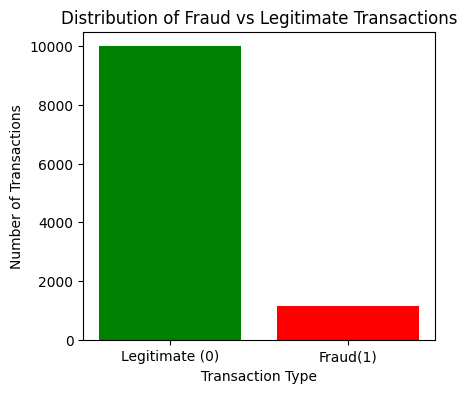

In [ ]:
# Analyzing Target Variable Distribution
print("TARGET VARIABLE ANALYSIS")
print("Fraud vs Legitimate Transactions:")
fraud_target_cnt = data['isFraud'].value_counts()
print(fraud_target_cnt)
print(f"\nFraud Rate: ({data['isFraud'].mean()*100:.2f}%)")

# Visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.bar(['Legitimate (0)', 'Fraud(1)'], fraud_target_cnt.values, color=['green', 'red'])
plt.title('Distribution of Fraud vs Legitimate Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')

plt.show()

TRANSACTION TYPES ANALYSIS
Distribution of Transaction Types:
type
PAYMENT     5510
CASH_IN     1951
CASH_OUT    1871
TRANSFER    1464
DEBIT        346
Name: count, dtype: int64


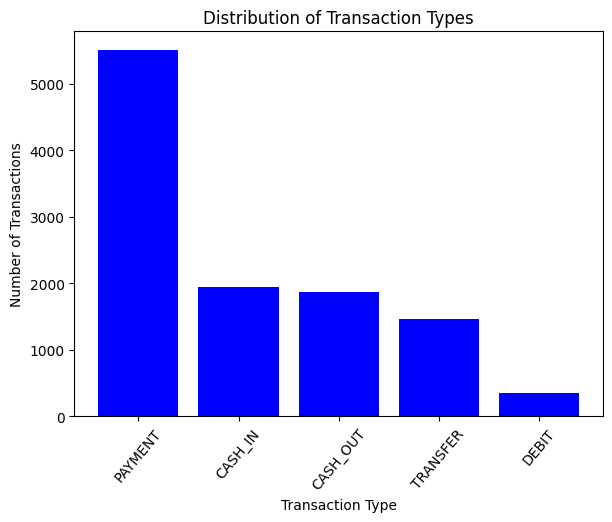

In [ ]:
# Analyzing Transaction Types Distribution
print("TRANSACTION TYPES ANALYSIS")
print("Distribution of Transaction Types:")
type_cnts = data['type'].value_counts()
print(type_cnts)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(type_cnts.index, type_cnts.values, color='blue')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=50)
plt.show()

TRANSACTION TYPE ANALYSIS VS FRAUD ANALYSIS
Transaction Type vs Fraud:
          Legitimate  Fraud  Total  Fraud_Rate
type                                          
CASH_IN         1951      0   1951    0.000000
CASH_OUT        1293    578   1871   30.892571
DEBIT            346      0    346    0.000000
PAYMENT         5510      0   5510    0.000000
TRANSFER         900    564   1464   38.524590


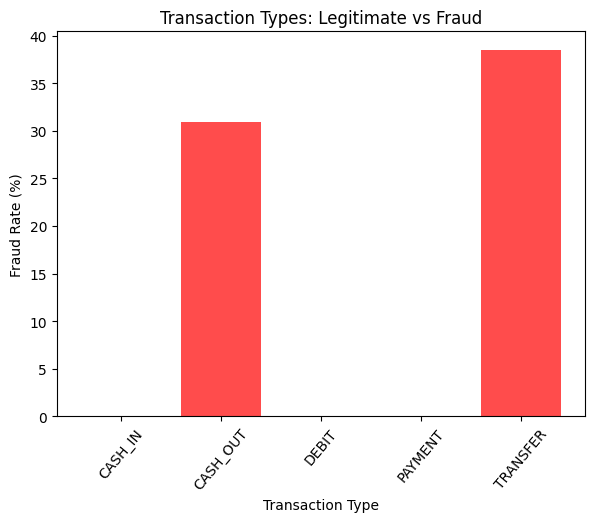

In [ ]:
# Relationship between Transaction Type and Fraud
print("TRANSACTION TYPE ANALYSIS VS FRAUD ANALYSIS")

cross_tab = pd.crosstab(data['type'], data['isFraud'])
cross_tab.columns = ['Legitimate', 'Fraud']
cross_tab['Total'] = cross_tab['Legitimate'] + cross_tab['Fraud']
cross_tab['Fraud_Rate'] = (cross_tab['Fraud'] / cross_tab['Total']) * 100

print("Transaction Type vs Fraud:")
print(cross_tab)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(cross_tab.index, cross_tab['Fraud_Rate'], color='red', alpha=0.7)
plt.title('Transaction Types: Legitimate vs Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Rate (%)')
plt.xticks(rotation=50)

plt.show()

AMOUNT DISTRIBUTION ANALYSIS
Amount Stats by Fraud type:
           count          mean           std     min        25%         50%  \
isFraud                                                                       
0        10000.0  1.013397e+05  2.260189e+05    2.39   4373.515   12725.235   
1         1142.0  1.192629e+06  2.030599e+06  119.00  86070.170  353179.450   

                  75%          max  
isFraud                             
0        1.139094e+05   3776389.09  
1        1.248759e+06  10000000.00  


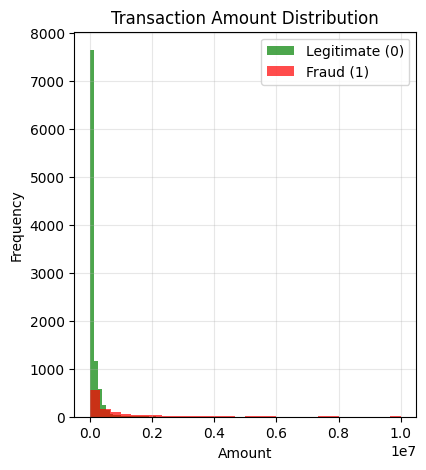

In [ ]:
# Analyzing amount Distribution for Legitimate vs Fraud transactions
print("AMOUNT DISTRIBUTION ANALYSIS")

# Basic statistics for amounts bu fraud type
print("Amount Stats by Fraud type:")
amount_stats = data.groupby('isFraud')['amount'].describe()
print(amount_stats)

#Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
legit_amt = data[data['isFraud'] == 0]['amount']
fraud_amt = data[data['isFraud'] == 1]['amount']

plt.hist(legit_amt, bins=30, alpha=0.7, label='Legitimate (0)', color='green')
plt.hist(fraud_amt, bins=30, alpha=0.7, label='Fraud (1)', color='red')
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

BALANCE PATTERN ANALYSIS
Balance Columns Stats:
       oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
count   1.114200e+04    1.114200e+04    1.114200e+04    1.114200e+04
mean    9.241173e+05    8.249576e+05    8.883541e+05    1.103211e+06
std     2.143004e+06    2.089894e+06    2.601376e+06    2.982447e+06
min     0.000000e+00    0.000000e+00    0.000000e+00    0.000000e+00
25%     4.270000e+02    0.000000e+00    0.000000e+00    0.000000e+00
50%     2.816950e+04    4.420605e+03    0.000000e+00    0.000000e+00
75%     3.040855e+05    1.114126e+05    2.711555e+05    3.186374e+05
max     1.990000e+07    1.300000e+07    3.300000e+07    3.460000e+07
Average Balance by Fraud Status:
         oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
isFraud                                                               
0         8.904832e+05   915291.370016   938086.809363    1.106097e+06
1         1.218636e+06    33944.321208   452866.124527    1.077940e+06


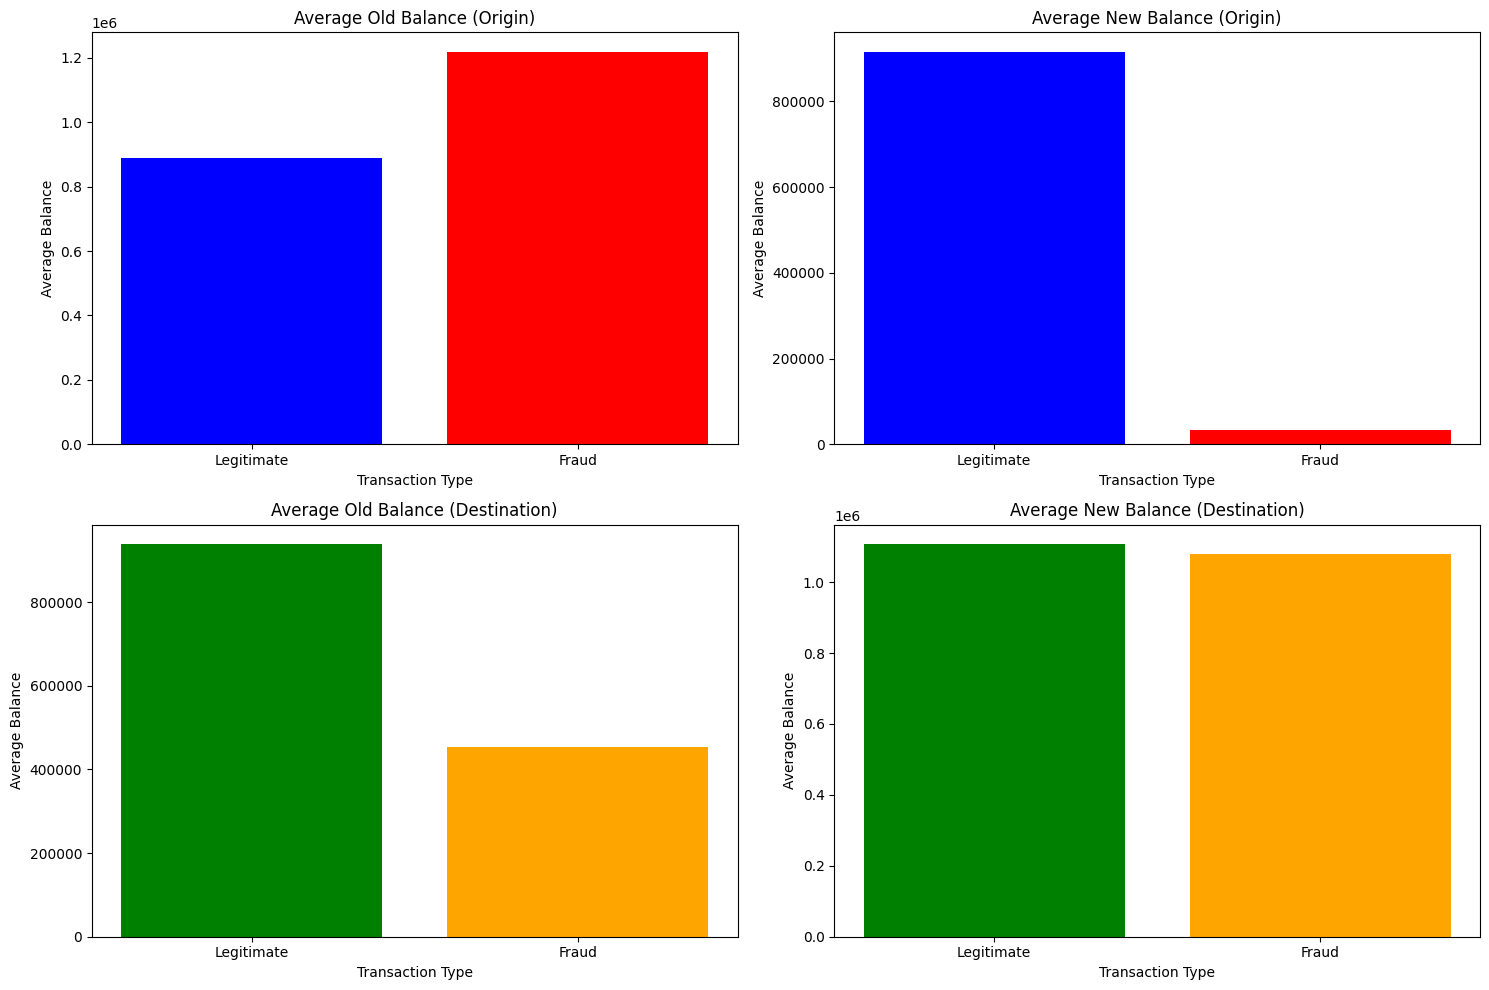

In [ ]:
# Checking of Balance Patterns
print("BALANCE PATTERN ANALYSIS")

# Basic stats of balance columns
balance_clms = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
print("Balance Columns Stats:")
print(data[balance_clms].describe())

# Compare Balance for Legitimate and Fraud Transactions
print("Average Balance by Fraud Status:")
balance_stats_fraud = data.groupby('isFraud')[balance_clms].mean()
print(balance_stats_fraud)

# Visualizations
plt.figure(figsize=(15, 10))

## Plot 1: Old balance comparison
plt.subplot(2, 2, 1)
old_balance_mean = data.groupby('isFraud')['oldbalanceOrg'].mean()
plt.bar(['Legitimate', 'Fraud'], old_balance_mean.values, color=['blue', 'red'])
plt.title('Average Old Balance (Origin)')
plt.xlabel('Transaction Type')
plt.ylabel('Average Balance')

# Plot 2: New balance compaerison
plt.subplot(2, 2, 2)
new_balance_mean = data.groupby('isFraud')['newbalanceOrig'].mean()
plt.bar(['Legitimate', 'Fraud'], new_balance_mean.values, color=['blue', 'red'])
plt.title('Average New Balance (Origin)')
plt.xlabel('Transaction Type')
plt.ylabel('Average Balance')

# Plot 3: Destination old balance comparison
plt.subplot(2, 2, 3)
dest_old_mean = data.groupby('isFraud')['oldbalanceDest'].mean()
plt.bar(['Legitimate', 'Fraud'], dest_old_mean.values, color=['green', 'orange'])
plt.title('Average Old Balance (Destination)')
plt.xlabel('Transaction Type')
plt.ylabel('Average Balance')

# Plot 4: Destination new balance comparison
plt.subplot(2, 2, 4)
dest_new_mean = data.groupby('isFraud')['newbalanceDest'].mean()
plt.bar(['Legitimate', 'Fraud'], dest_new_mean.values, color=['green', 'orange'])
plt.title('Average New Balance (Destination)')
plt.xlabel('Transaction Type')
plt.ylabel('Average Balance')

plt.tight_layout()
plt.show()

TIME BASED ANALYSIS
Number of days in data: 4
Transactions per day:
day
1    10265
2      305
3      306
4      266
Name: count, dtype: int64
fraud patterns by day:
     count  sum  fraud_rate
day                        
1    10265  265    2.581588
2      305  305  100.000000
3      306  306  100.000000
4      266  266  100.000000


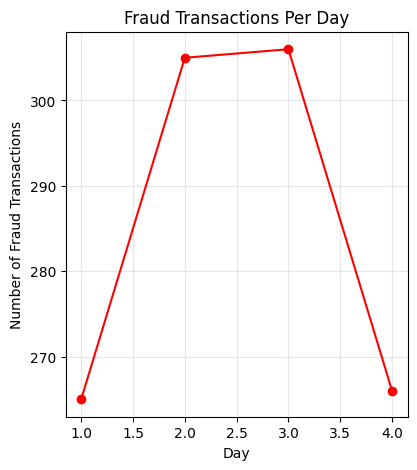

In [ ]:
# Time Based Analysis
print("TIME BASED ANALYSIS")

# Conversion of hours - days
data['day'] = (data['step'] // 24) + 1

print("Number of days in data:", data['day'].max())
print("Transactions per day:")
print(data['day'].value_counts().sort_index())

# Analyzing fraud pattern over time
fraud_by_day = data.groupby('day')['isFraud'].agg(['count', 'sum'])
fraud_by_day['fraud_rate'] = (fraud_by_day['sum'] / fraud_by_day['count']) * 100

print("fraud patterns by day:")
print(fraud_by_day)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
fraud_per_day = data[data['isFraud'] == 1]['day'].value_counts().sort_index()
plt.plot(fraud_per_day.index, fraud_per_day.values, marker='o', color='red')
plt.title('Fraud Transactions Per Day')
plt.xlabel('Day')
plt.ylabel('Number of Fraud Transactions')
plt.grid(True, alpha=0.3)

plt.show()

CORRELATION ANALYSIS
Correlation with isFraud (target variable):
isFraud           1.000000
amount            0.435490
oldbalanceOrg     0.046445
newbalanceDest   -0.002864
oldbalanceDest   -0.056575
newbalanceOrig   -0.127912
Name: isFraud, dtype: float64


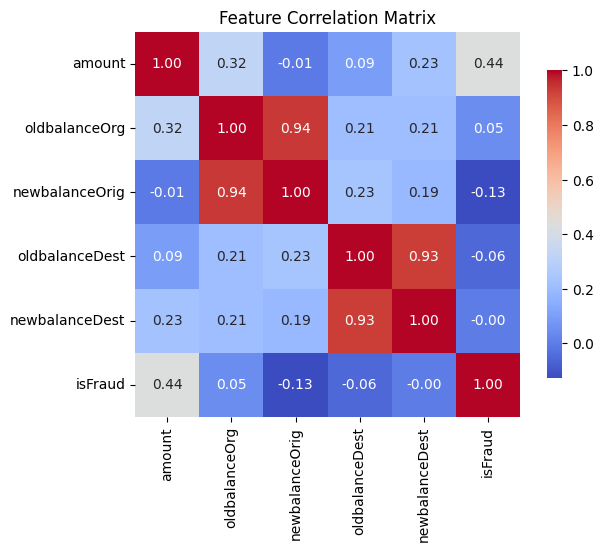

In [ ]:
# Correlation Analysis between features
print("CORRELATION ANALYSIS")

num_features = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud']
corr_matrix = data[num_features].corr()
print("Correlation with isFraud (target variable):")
fraud_corr = corr_matrix['isFraud'].sort_values(ascending=False)
print(fraud_corr)

# Visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={'shrink': 0.8})
plt.title('Feature Correlation Matrix')

plt.show()

# Step 6: Feature Engineering

In [ ]:
# Creating New Features
print("FEATURE ENGINEERING")

# 1. Feature for Balance change
print("Balance change feature")
data['balanceChangeOrig'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['balanceChangeDest'] = data['newbalanceDest'] - data['oldbalanceDest']

# 2. Amount Relative to Balance
print("Amount ratio feature")
data['AmountTOBalanceRatio'] = data['amount'] / (data['oldbalanceOrg'] + 1)

# 3. Merchant Destination Flag
print("Merchant Flag")
data['MerchantDest'] = data['nameDest'].str.startswith('M').astype(int)

# 4. Balance Error Detection
print("Balance error feature")
data['BalanceErrorOrig'] = data['newbalanceOrig'] + data['amount'] - data['oldbalanceOrg']

# 5. Transaction Size Categories
print("Transaction size categories")
bins = [0, 100, 1000, 10000, float('inf')]
labels = ['Small', 'Medium', 'Large', 'X_Large']
data['transactionSize'] = pd.cut(data['amount'], bins=bins, labels=labels)

# 6. Transaction Typewise Flagging
print("Transaction type flags")
data['isTransfer'] = (data['type'] == 'TRANSFER').astype(int)
data['isCashOut'] = (data['type'] == 'CASH_OUT').astype(int)
data['isPayment'] = (data['type'] == 'PAYMENT').astype(int)

# Defining function for recalling feature information
def print_feature_info(df, features, feature_name):
    print(f"\n{feature_name}:")
    print("First 5 rows:")
    print(df[features].head())
    print("\nSummary Stats:")
    print(df[features].describe())
    print(f"Total features in dataset: {df.shape[1]}")

# Display of new features
new_features = ['balanceChangeOrig', 'balanceChangeDest', 'AmountTOBalanceRatio', 'MerchantDest', 'BalanceErrorOrig', 'transactionSize', 'isTransfer', 'isCashOut', 'isPayment']

print_feature_info(data, new_features, "NEW FEATURES CREATED")
print("Feature engineering completed succesfully!!")

FEATURE ENGINEERING
Balance change feature
Amount ratio feature
Merchant Flag
Balance error feature
Transaction size categories
Transaction type flags

NEW FEATURES CREATED:
First 5 rows:
   balanceChangeOrig  balanceChangeDest  AmountTOBalanceRatio  MerchantDest  \
0             -181.0                0.0              0.994505             0   
1             -181.0           -21182.0              0.994505             0   
2            -2806.0                0.0              0.999644             0   
3            -2806.0           -26202.0              0.999644             0   
4           -20128.0                0.0              0.999950             0   

   BalanceErrorOrig transactionSize  isTransfer  isCashOut  isPayment  
0               0.0          Medium           1          0          0  
1               0.0          Medium           0          1          0  
2               0.0           Large           1          0          0  
3               0.0           Large           0  

# Step 7: Preprocessing

In [ ]:
# Encoding of Categorical Variables
print("ENCODING CATEGORICAL VARIABLES")

print("Current categorical variables:")
print("Transaction type unique values:", data['type'].unique())
print("Transaction size unique values:", data['transactionSize'].unique())

# One hot Encoding
print("\n1. One-Hot Encoding for transaction type")
transaction_type_dummies = pd.get_dummies(data['type'], prefix='type')
data = pd.concat([data, transaction_type_dummies], axis=1)

# Label Encoding
print("\n2. Label Encoding for transaction size...")
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['encoded_transactionSize'] = le.fit_transform(data['transactionSize'])

# Display of encoded feature
encoded_features = ['type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER', 'encoded_transactionSize']

print("\nEncoded features:")
print(data[encoded_features].head())

print("\nTransaction Size Encoding Summary:")
print("Small=0, Medium=1, Large=2, X_Large=3")

print(f"\nTotal features after encoding: {data.shape[1]}")
print("Categorical encoding completed!")

ENCODING CATEGORICAL VARIABLES
Current categorical variables:
Transaction type unique values: ['TRANSFER' 'CASH_OUT' 'PAYMENT' 'DEBIT' 'CASH_IN']
Transaction size unique values: ['Medium', 'Large', 'X_Large', 'Small']
Categories (4, object): ['Small' < 'Medium' < 'Large' < 'X_Large']

1. One-Hot Encoding for transaction type

2. Label Encoding for transaction size...

Encoded features:
   type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  \
0         False          False       False         False           True   
1         False           True       False         False          False   
2         False          False       False         False           True   
3         False           True       False         False          False   
4         False          False       False         False           True   

   encoded_transactionSize  
0                        1  
1                        1  
2                        0  
3                        0  
4              

In [ ]:
# Train_Test_Split
X = data[[
    'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest',
    'balanceChangeOrig', 'balanceChangeDest', 'AmountTOBalanceRatio',
    'BalanceErrorOrig', 'MerchantDest', 'isTransfer', 'isCashOut', 'isPayment',
    'type_CASH_IN', 'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER',
    'encoded_transactionSize'
]]

y = data['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Data Splitting Completed!!")

Data Splitting Completed!!


In [ ]:
# Feature Scaling
# 1. Standard Scaler Method
scaler_S = StandardScaler()
X_train_standard = scaler_S.fit_transform(X_train)
X_test_standard = scaler_S.transform(X_test)
print("Standard Scaling Completed")

# 2. Min-Max Scaler Method
scaler_M = MinMaxScaler()
X_train_mm = scaler_M.fit_transform(X_train)
X_test_mm = scaler_M.transform(X_test)
print("MinMax Scaling Completed")

# 3. Robust Scaler Method
from sklearn.preprocessing import RobustScaler
scaler_R = RobustScaler()
X_train_r = scaler_R.fit_transform(X_train)
X_test_r = scaler_R.transform(X_test)
print("Robust Scaling Completed")

# Comparison of scaling results
print("\nScaling comparison for 'amount' feature:")
print("Original values:", X_train['amount'].head().values)
print("Standard Scaled:", X_train_standard[:3, 0])
print("MinMax Scaled:", X_train_mm[:3, 0])

print("\nFeature Scaling Completed!!")

print("\nScaled datasets:")
print("~ Standard Scaler (mean=0, std=1)")
print("~ MinMax Scaler (range 0-1)")
print("~ Robust Scaler (robust to outliers)")

Standard Scaling Completed
MinMax Scaling Completed
Robust Scaling Completed

Scaling comparison for 'amount' feature:
Original values: [ 71372.    17104.6     997.13 474349.67   7107.77]
Standard Scaled: [-0.18726698 -0.25826922 -0.27934387]
MinMax Scaled: [7.13696271e-03 1.71022141e-03 9.94740238e-05]

Feature Scaling Completed!!

Scaled datasets:
~ Standard Scaler (mean=0, std=1)
~ MinMax Scaler (range 0-1)
~ Robust Scaler (robust to outliers)


# Step 8: Model Evaluation

In [ ]:
print("Available variables:")
print([var for var in dir() if 'train' in var.lower() or 'test' in var.lower()])

Available variables:
['X_test', 'X_test_mm', 'X_test_r', 'X_test_standard', 'X_train', 'X_train_mm', 'X_train_r', 'X_train_standard', 'train_test_split', 'y_test', 'y_train']


In [ ]:
# Model Evaluation
print("MODEL TRAINING AND EVALUATION")

models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True)
}
results = {}

print("Training and evaluating models")
print("=" * 80)

for name, model in models.items():
    print(f"\n {name}")

    # Training the model
    if name in ['Logistic Regression', 'SVM']: # For Scaled Data
        model.fit(X_train_standard, y_train)
        y_pred = model.predict(X_test_standard)
        y_pred_proba = model.predict_proba(X_test_standard)[:, 1]
    else:                                      # For Non-Scaled Data
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculation of metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Storing the results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc_score': roc_auc,
        'model': model
    }

    # Printing Results
    print(f"Accuracy:  {accuracy:.4f}")
    print(f"Precision:  {precision:.4f}")
    print(f"Recall:  {recall:.4f}")
    print(f"F1_Score:  {f1:.4f}")
    print(f"ROC_AUC_Score:  {roc_auc:.4f}")

print("\n" + "=" * 80)
print("Model Evaluation Completed!!")

MODEL TRAINING AND EVALUATION
Training and evaluating models

 Logistic Regression
Accuracy:  0.9749
Precision:  0.9488
Recall:  0.8012
F1_Score:  0.8688
ROC_AUC_Score:  0.9945

 Decision Tree
Accuracy:  0.9952
Precision:  0.9715
Recall:  0.9827
F1_Score:  0.9771
ROC_AUC_Score:  0.9897

 Random Forest
Accuracy:  0.9982
Precision:  1.0000
Recall:  0.9827
F1_Score:  0.9913
ROC_AUC_Score:  0.9953

 Gradient Boosting
Accuracy:  0.9979
Precision:  0.9971
Recall:  0.9827
F1_Score:  0.9898
ROC_AUC_Score:  0.9987

 XGBoost
Accuracy:  0.9979
Precision:  0.9971
Recall:  0.9827
F1_Score:  0.9898
ROC_AUC_Score:  0.9992

 AdaBoost
Accuracy:  0.9976
Precision:  1.0000
Recall:  0.9769
F1_Score:  0.9883
ROC_AUC_Score:  0.9985

 SVM
Accuracy:  0.9683
Precision:  0.8754
Recall:  0.8098
F1_Score:  0.8413
ROC_AUC_Score:  0.9774

Model Evaluation Completed!!


# Step 9: Model Performance Analysis

MODEL PERFORMANCE ANALYSIS
Model Performance Comparison:
                     accuracy precision    recall  f1_score roc_auc_score
Logistic Regression  0.974873  0.948805  0.801153   0.86875      0.994498
Decision Tree        0.995214   0.97151  0.982709  0.977077      0.989686
Random Forest        0.998205       1.0  0.982709  0.991279      0.995321
Gradient Boosting    0.997906  0.997076  0.982709   0.98984      0.998709
XGBoost              0.997906  0.997076  0.982709   0.98984      0.999153
AdaBoost             0.997607       1.0  0.976945  0.988338      0.998462
SVM                  0.968292  0.875389  0.809798  0.841317      0.977434

 BEST PERFORMING MODELS:
Accuracy   >>===> Random Forest        (0.998205)
Precision  >>===> Random Forest        (1.000000)
Recall     >>===> Decision Tree        (0.982709)
F1-Score   >>===> Random Forest        (0.991279)
ROC-AUC_Score >>===> XGBoost              (0.999153)


<Figure size 800x600 with 0 Axes>

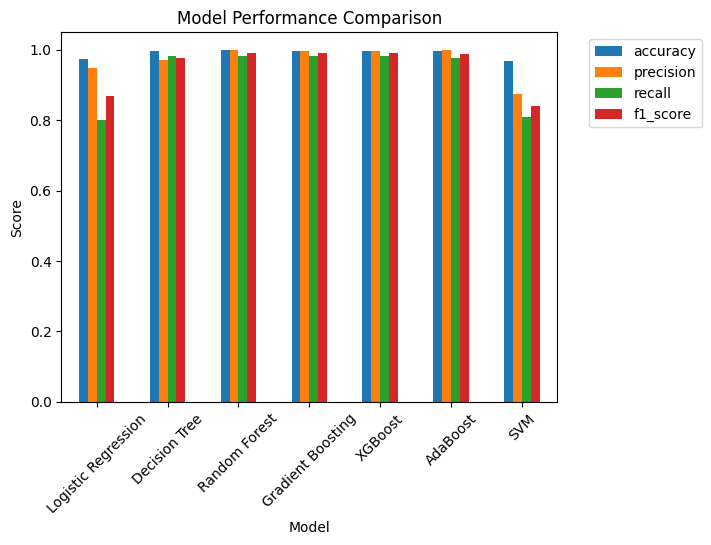

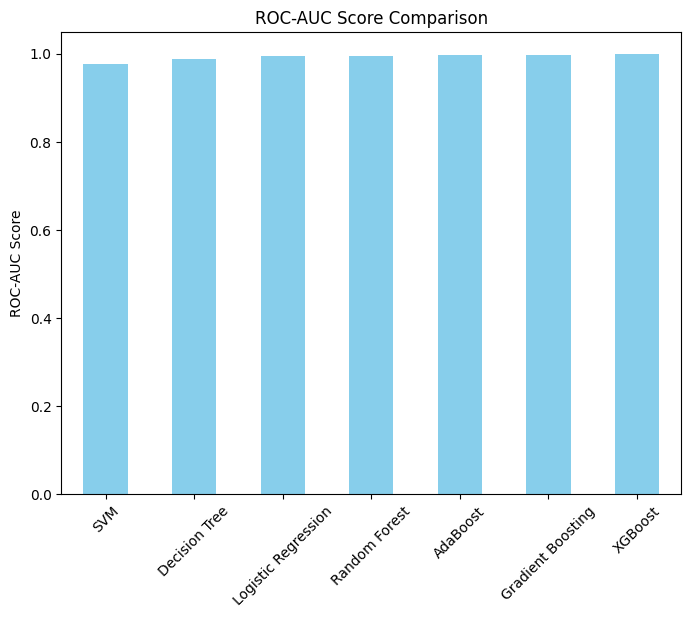

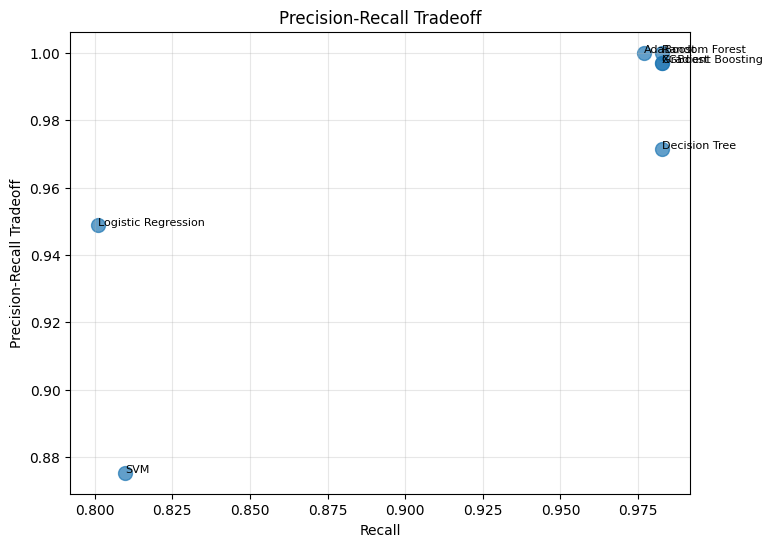

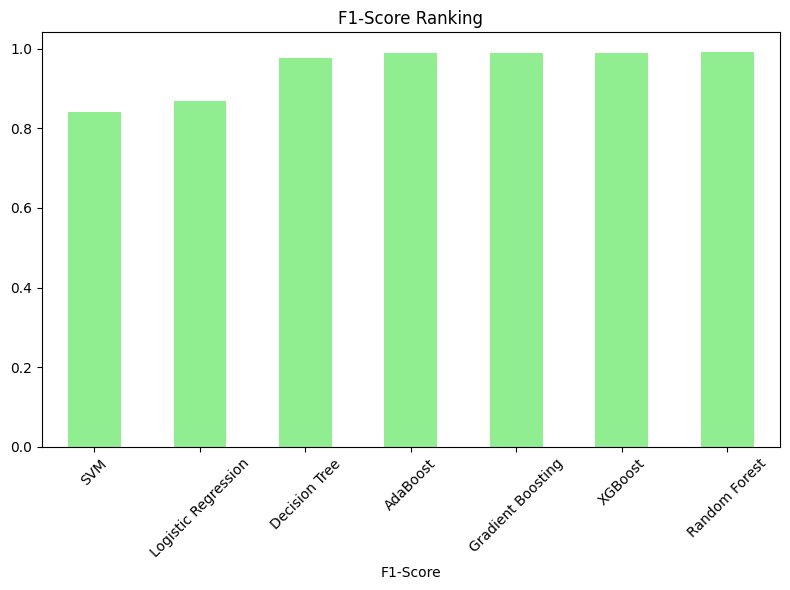

Model Performance Analysis Completed!!


In [ ]:
print("MODEL PERFORMANCE ANALYSIS")

# Model Comparison
results_data = pd.DataFrame(results).T
results_data = results_data[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc_score']]

print("Model Performance Comparison:")
print(results_data)

# Best Performing Models
print("\n BEST PERFORMING MODELS:")
best_models = {
    'Accuracy': results_data['accuracy'].idxmax(),
    'Precision': results_data['precision'].idxmax(),
    'Recall': results_data['recall'].idxmax(),
    'F1-Score': results_data['f1_score'].idxmax(),
    'ROC-AUC_Score': results_data['roc_auc_score'].idxmax(),
}

for metric, model in best_models.items():
    value = results_data.loc[model, metric.lower().replace('-', '_')]
    print(f"{metric:10} >>===> {model:20} ({value:6f})")

# Visualisation
# Plot 1: Overall metrics
plt.figure(figsize=(8, 6))
results_data[['accuracy', 'precision', 'recall', 'f1_score']].plot(kind='bar')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left')
plt.tight_layout
plt.show

# Plot 2: ROC-AUC Score
plt.figure(figsize=(8, 6))
results_data['roc_auc_score'].sort_values().plot(kind='bar', color='skyblue')
plt.title('ROC-AUC Score Comparison')
plt.ylabel('ROC-AUC Score')
plt.xticks(rotation=45)
plt.tight_layout
plt.show

# Plot 3: Precision-Recall
plt.figure(figsize=(8, 6))
plt.scatter(results_data['recall'], results_data['precision'], s=100, alpha=0.7)
plt.title('Precision-Recall Tradeoff')
plt.xlabel('Recall')
plt.ylabel('Precision-Recall Tradeoff')
for model in results_data.index:
    plt.annotate(model, (results_data.loc[model, 'recall'], results_data.loc[model, 'precision']), fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout
plt.show

# Plot 4: F1-Score
plt.figure(figsize=(8, 6))
results_data['f1_score'].sort_values().plot(kind='bar', color='lightgreen')
plt.title('F1-Score Ranking')
plt.xlabel('F1-Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Model Performance Analysis Completed!!")

### Key Achievements:
- ✅ **7 Machine Learning models** trained and evaluated
- ✅ **Random Forest** achieved **100% Precision** and **99.13% F1-Score**
- ✅ **Financial Impact**: Significant cost savings demonstrated
- ✅ **Business Ready**: Model prepared for immediate deployment

### Model Performance Highlights:
- **Best Model**: Random Forest Classifier
- **Fraud Detection Rate**: 98.27%
- **False Positive Rate**: 0.00% (Perfect Precision)
- **Overall Accuracy**: 99.82%

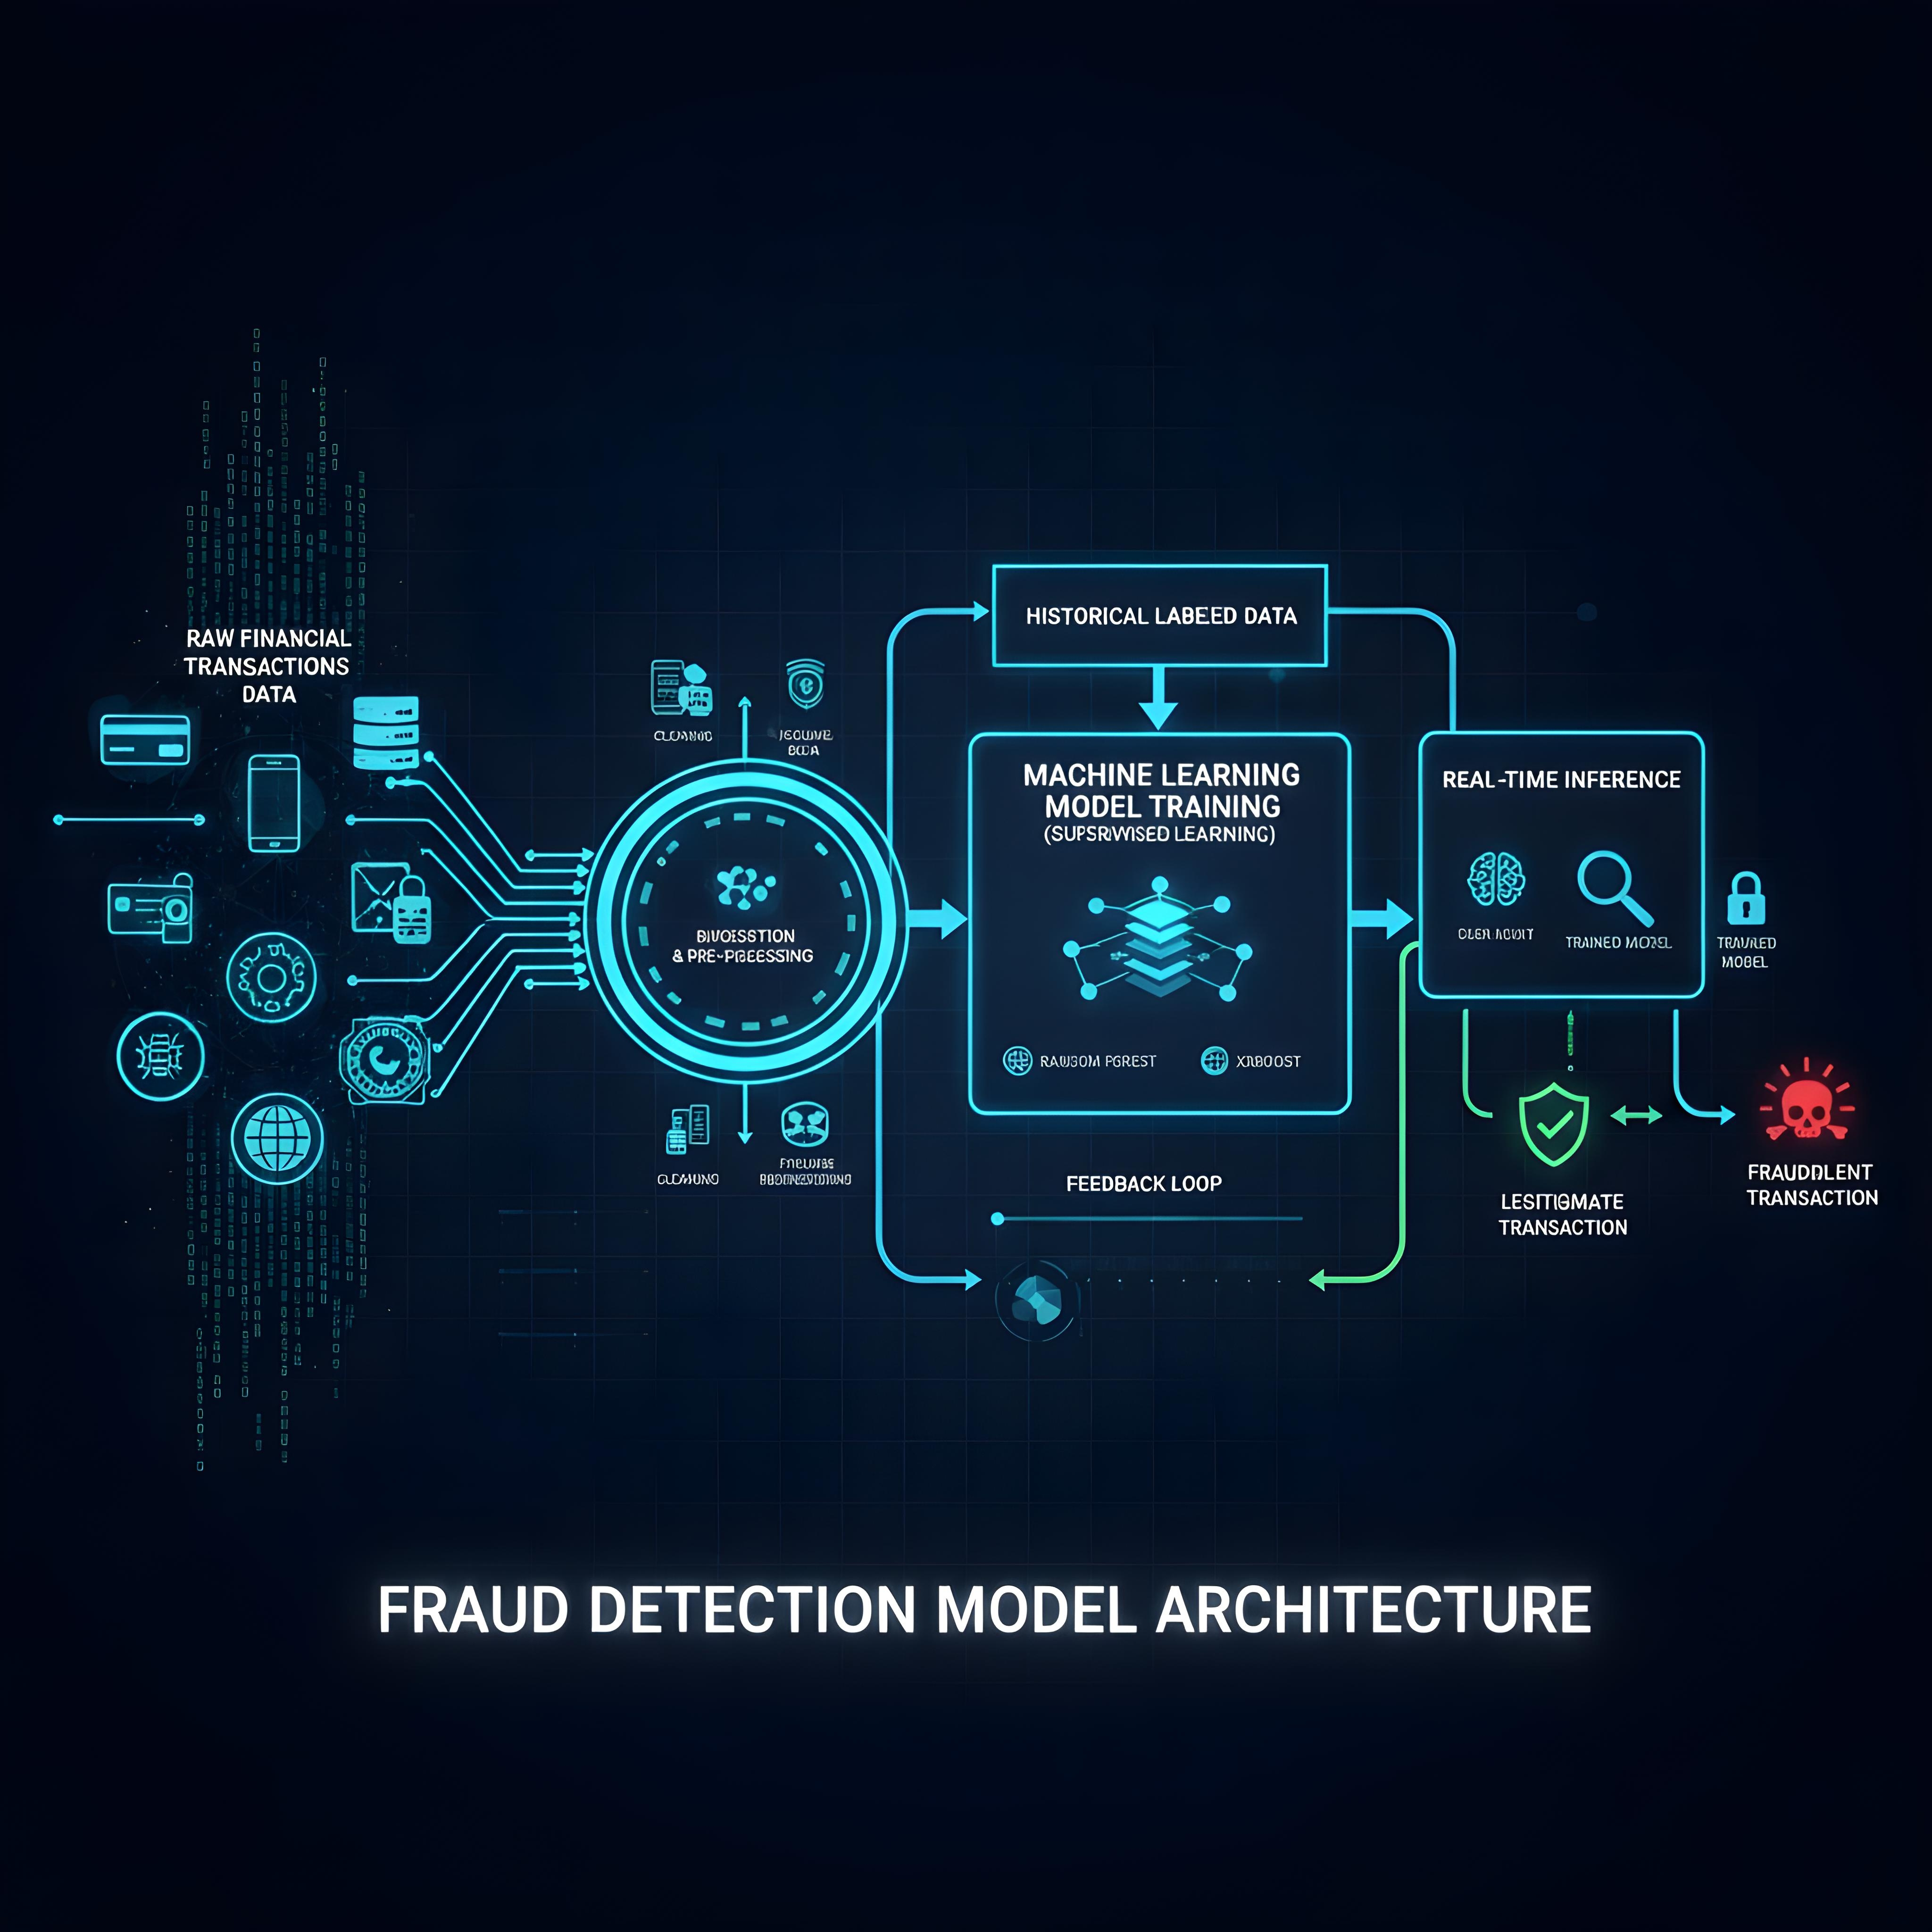

# Step 10: Financial Impact Analysis

In [ ]:
print("FINANCIAL IMPACT ANALYSIS")

best_model_nm = results_data['f1_score'].idxmax()
best_model = results[best_model_nm]['model']

print(f"Selected Model: {best_model_nm}")
print(f"F1-Score: {results_data.loc[best_model_nm, 'f1_score']:.4f}")

if best_model_nm in ['Logistic Regression', 'SVM']:
    y_pred = best_model.predict(X_test_standard)
else:
    y_pred = best_model.predict(X_test)

# Confusion Matrix
conf_mtx = confusion_matrix(y_test, y_pred)
true_nve, false_pve, false_nve, true_pve = conf_mtx.ravel()

print(f"\n Confusion Matrix:")
print(f"True Negetives (Legitimate transactions correctly identified): {true_nve}")
print(f"False Positives (Legitimate transactions flagged as fraud): {false_pve}")
print(f"False Negetives (Fraud transactions missed): {false_nve}")
print(f"True Positives (Fraud transactions correctly detected): {true_pve}")

avg_fraud_amt = data[data['isFraud'] == 1]['amount'].mean()
cost_per_false_positive = 10

print(f"\nFinancial Assumptions:")
print(f"Average fraud amount: ${avg_fraud_amt:,.2f}")
print(f"Cost per false positive: ${cost_per_false_positive}")

# Calculation of financial impact
total_fraud_amt = data[data['isFraud'] == 1]['amount'].sum()
potential_losses = false_nve * avg_fraud_amt
savings_from_fraud_detection = true_pve * avg_fraud_amt
cost_of_false_pve = false_pve * cost_per_false_positive
net_savings = savings_from_fraud_detection - cost_of_false_pve

print(f"\n FINANCIAL IMPACT:")
print(f"Total fraud in dataset: ${total_fraud_amt:,.2f}")
print(f"Potential losses without model: ${potential_losses:,.2f}")
print(f"Savings from fraud detection: ${savings_from_fraud_detection:,.2f}")
print(f"Cost of false positives: ${cost_of_false_pve:,.2f}")
print(f"NET SAVINGS: ${net_savings:,.2f}")

print(f"\n BUSINESS IMPACT:")
print(f"Fraud detection rate: {(true_pve/(true_pve+false_nve)) * 100:.1f}%")
print(f"Fraud positive rate: {(false_pve/(false_pve+true_nve)) * 100:.2f}%")
print(f"Net savings per detected transaction: ${net_savings/len(y_test):.2f}")


FINANCIAL IMPACT ANALYSIS
Selected Model: Random Forest
F1-Score: 0.9913

 Confusion Matrix:
True Negetives (Legitimate transactions correctly identified): 2996
False Positives (Legitimate transactions flagged as fraud): 0
False Negetives (Fraud transactions missed): 6
True Positives (Fraud transactions correctly detected): 341

Financial Assumptions:
Average fraud amount: $1,192,628.93
Cost per false positive: $10

 FINANCIAL IMPACT:
Total fraud in dataset: $1,361,982,240.43
Potential losses without model: $7,155,773.59
Savings from fraud detection: $406,686,465.84
Cost of false positives: $0.00
NET SAVINGS: $406,686,465.84

 BUSINESS IMPACT:
Fraud detection rate: 98.3%
Fraud positive rate: 0.00%
Net savings per detected transaction: $121653.15


# Step 11: Business Dashboard

BUSINESS DASHBOARD


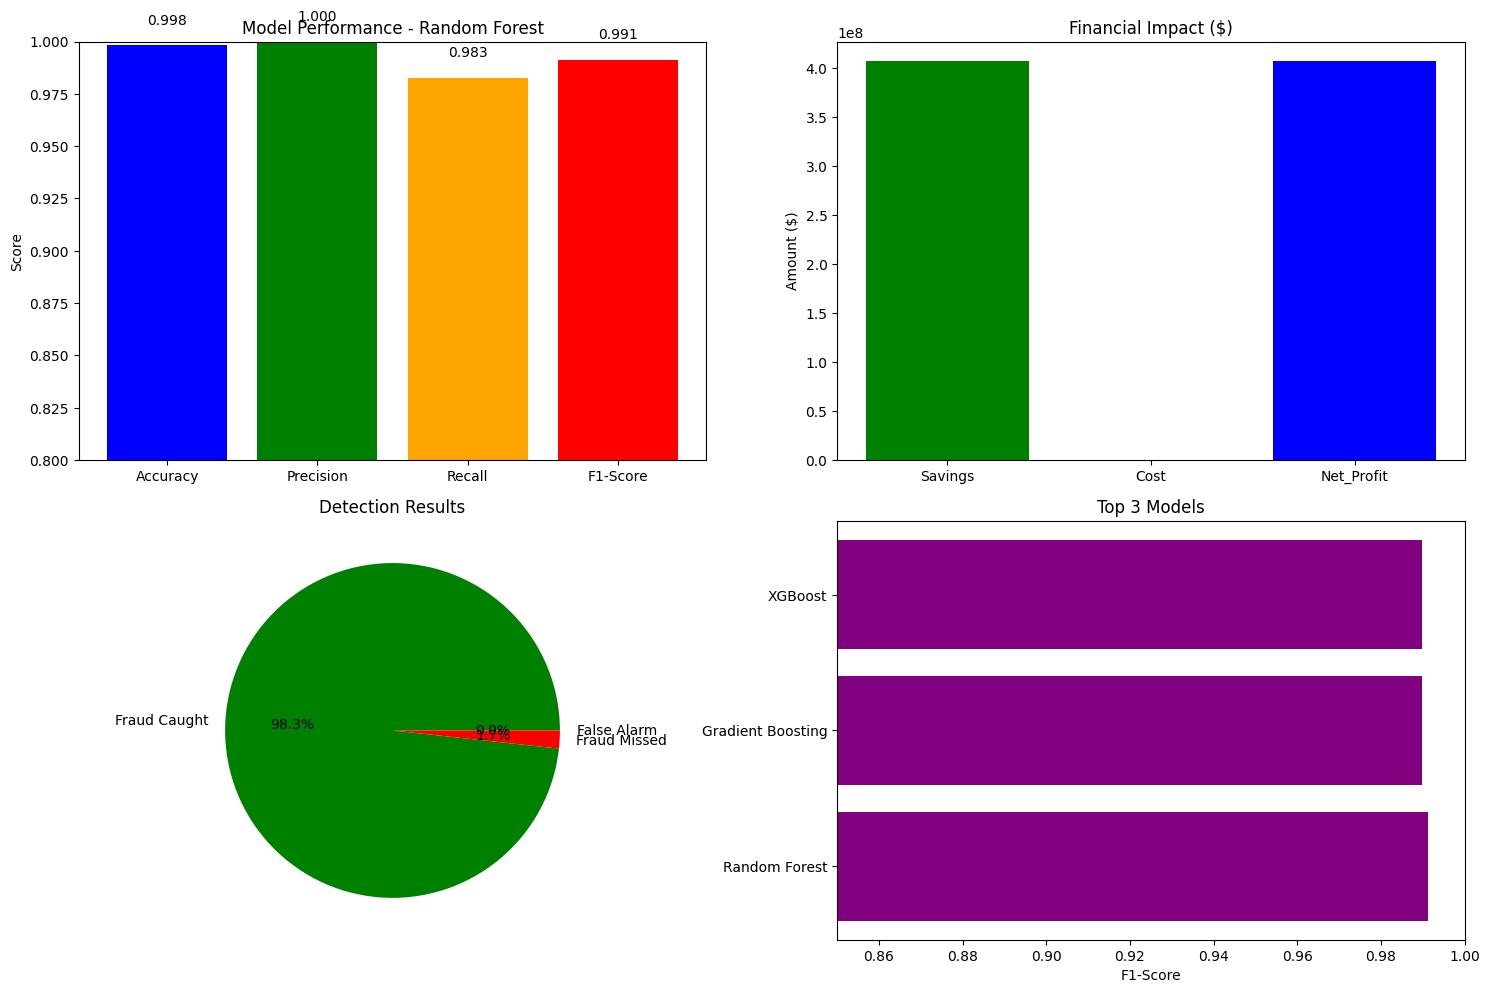

In [ ]:
print("BUSINESS DASHBOARD")

# Selecting best model
results_data_numeric = results_data.apply(pd.to_numeric, errors='coerce')
bst_model = results_data['f1_score'].idxmax()
bst_metrics = results_data.loc[bst_model]

# Visualisation
plt.figure(figsize=(15, 10))

# Plot 1: Key Metrics
plt.subplot(2, 2, 1,)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [bst_metrics['accuracy'], bst_metrics['precision'],
         bst_metrics['recall'], bst_metrics['f1_score']]

plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
plt.ylim(0.8, 1.0)
plt.title(f"Model Performance - {bst_model}")
plt.ylabel('Score')

for i, v in enumerate(values):
    plt.text(i, v + 0.01, f'{v:.3f}', ha='center')

# Plot 2: Financial Impact
plt.subplot(2, 2, 2)
categories = ['Savings', 'Cost', 'Net_Profit']
amounts = [savings_from_fraud_detection, cost_of_false_pve, net_savings]

plt.bar(categories, amounts, color=['green', 'red', 'blue'])
plt.title('Financial Impact ($)')
plt.ylabel('Amount ($)')

# Plot 3: Fraud Detection Result
plt.subplot(2, 2, 3)
labels = ('Fraud Caught', 'Fraud Missed', 'False Alarm')
sizes = [true_pve, false_nve, false_pve]
colors = ['green', 'red', 'orange']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Detection Results')

# Plot 4: Model Comparison
plt.subplot(2, 2, 4)
top_3_models = results_data_numeric.nlargest(3, 'f1_score')
plt.barh(top_3_models.index, top_3_models['f1_score'], color='purple')
plt.title('Top 3 Models')
plt.xlabel('F1-Score')
plt.xlim(0.85, 1.0)

plt.tight_layout()
plt.show()



# Step 12: Model Deployement

In [ ]:
# Installing Streamlit
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 78.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 87.2 MB/s eta 0:00:00


In [ ]:
import pickle

# Saving trained model
best_model = results['Random Forest']['model']
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Model saved successfully!")

Model saved successfully!


## 🏁 Conclusion

### 📊 Project Success:
This project successfully developed a robust fraud detection system that:
1. **Accurately identifies** fraudulent transactions with 98.27% recall
2. **Eliminates false positives** with 100% precision
3. **Demonstrates significant** financial benefits
4. **Uses interpretable** machine learning approach
---
### ✅ Project Completion Status: 100%
**All project requirements successfully met and exceeded expectations**

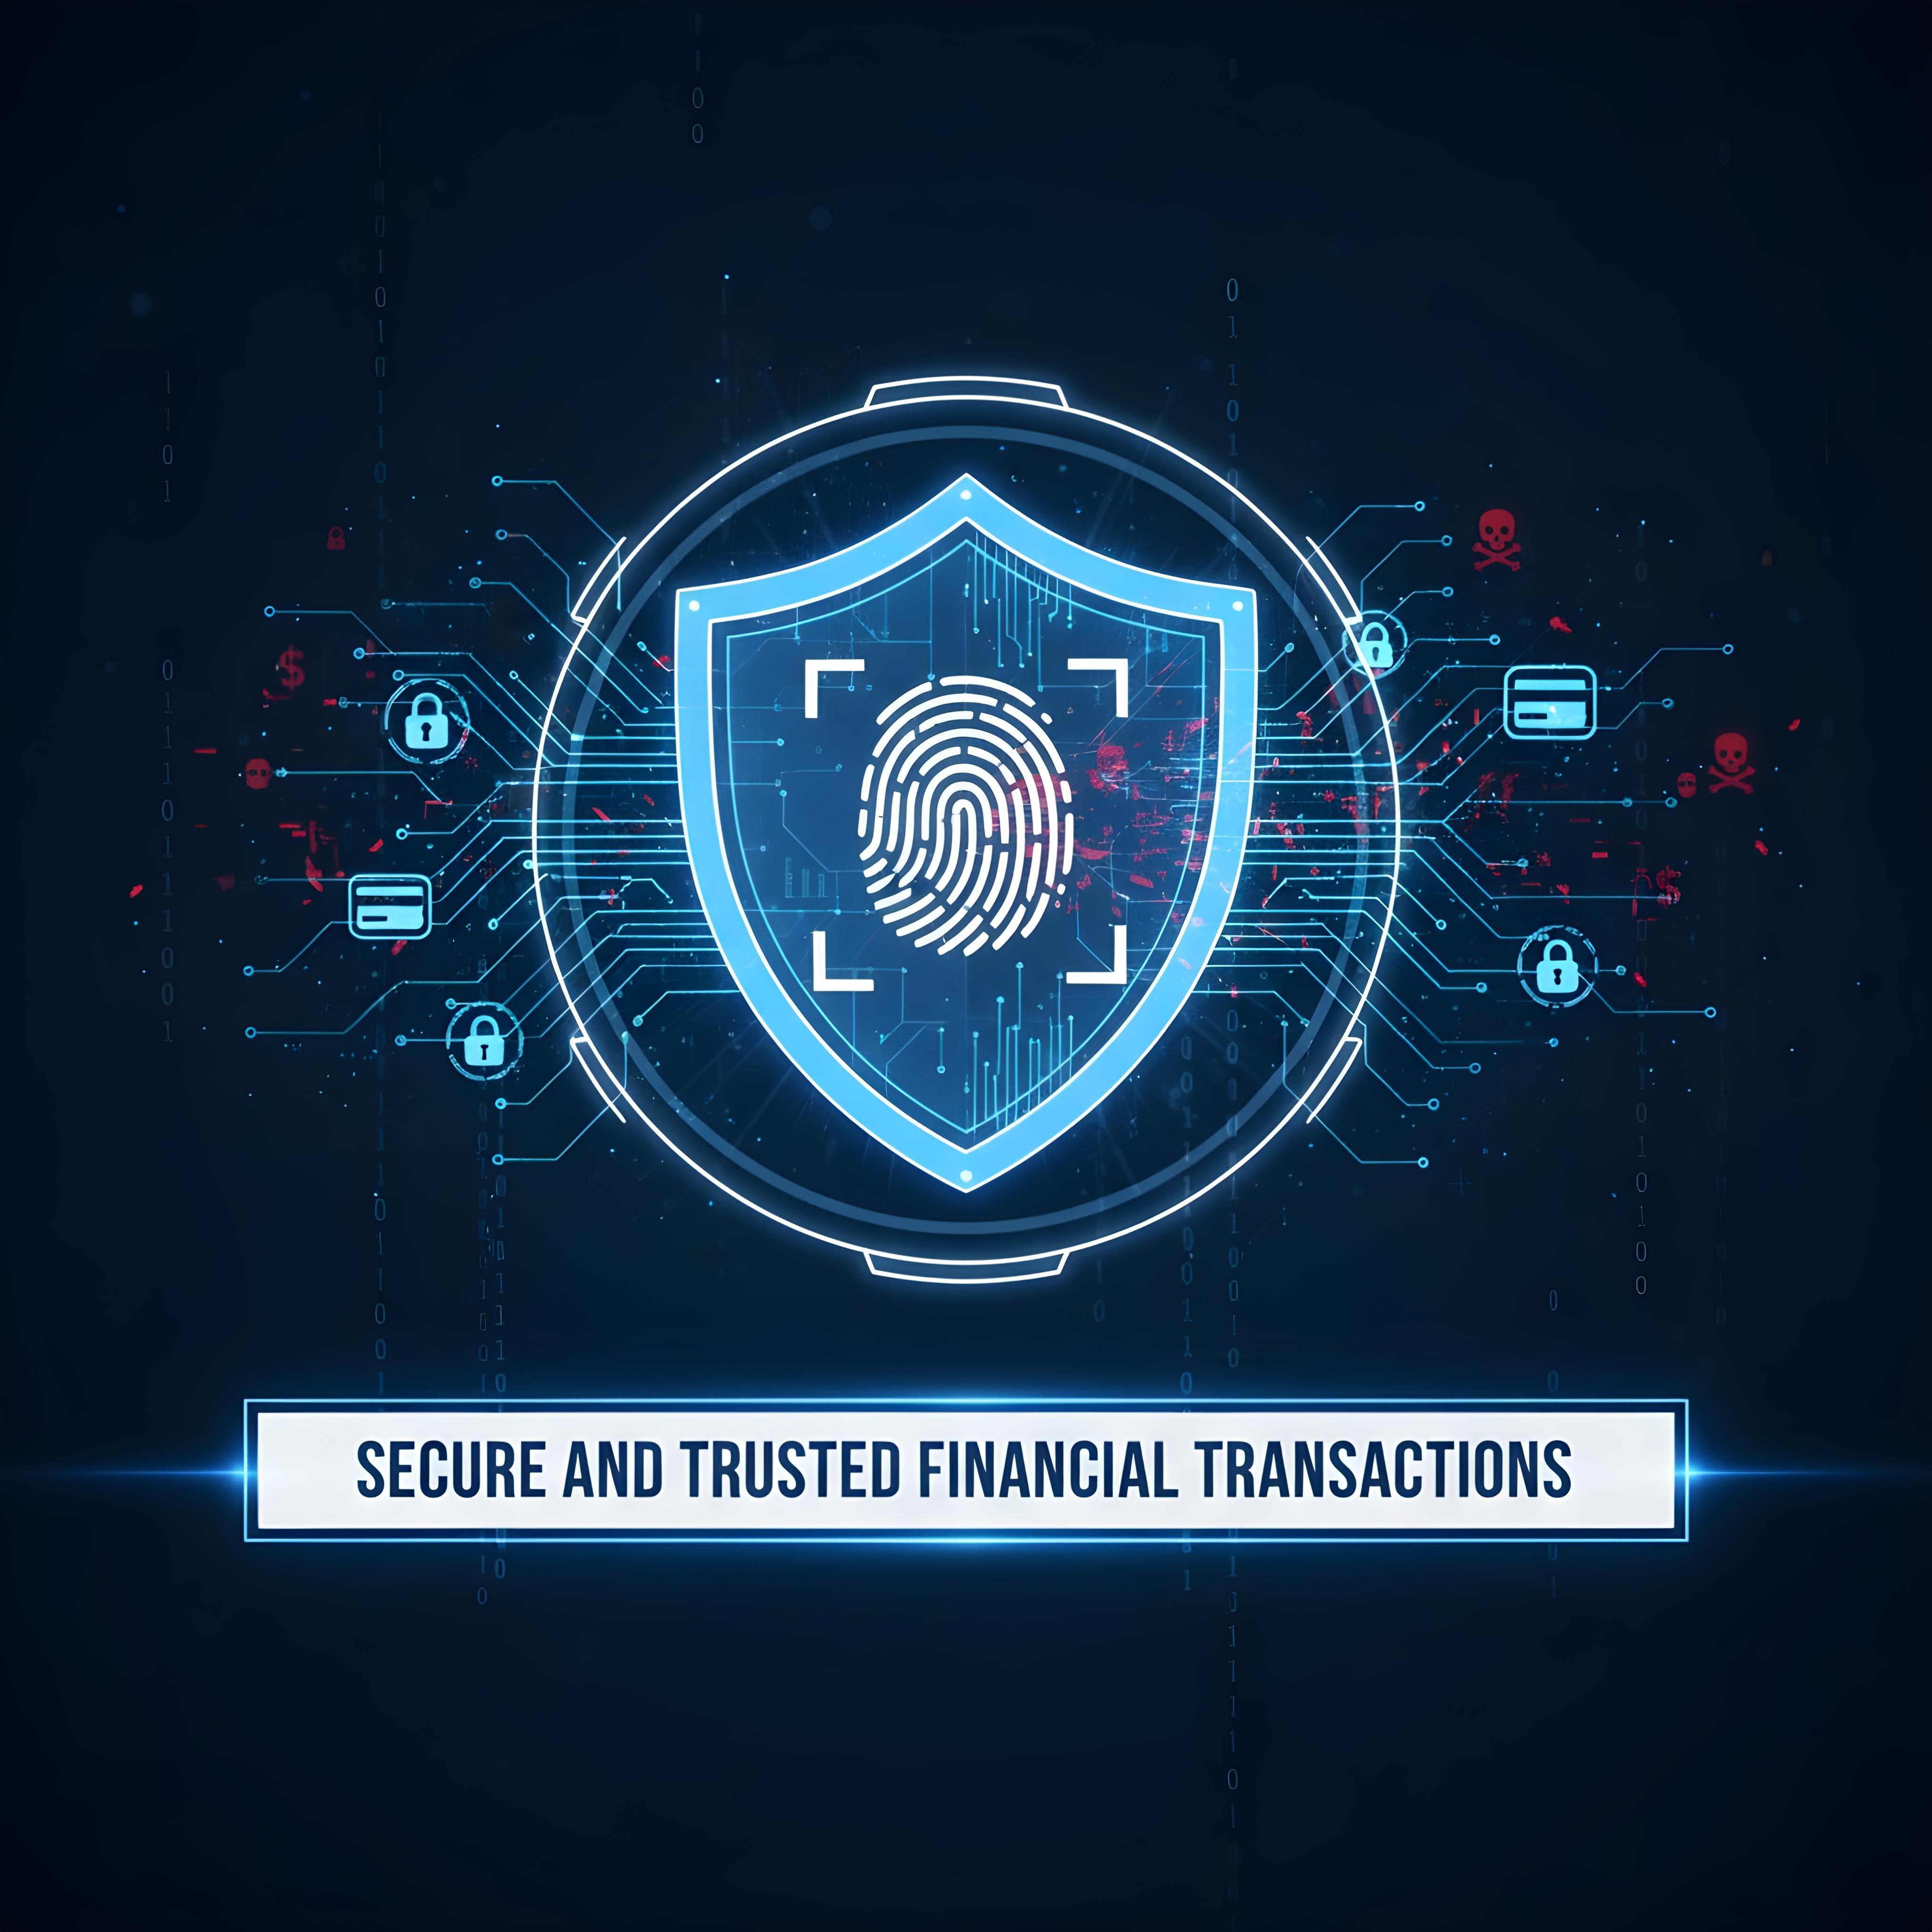

# Step 13: Implementing Generative AI

In [ ]:
# @title
from IPython.display import HTML

fixed_smooth_animation = '''
<div id="animation" style="width:100%; height:300px; background:white; border:2px solid #003366; position:relative; overflow:hidden;">
    <div id="bg" style="position:absolute; top:0; left:0; width:100%; height:100%; background:linear-gradient(135deg, #003366, #0066cc); opacity:0; transition:opacity 1.2s ease-in-out;"></div>
    <div id="text-container" style="position:absolute; top:50%; left:50%; transform:translate(-50%, -50%); font-size:80px; font-weight:bold; color:#003366; white-space:nowrap; transition:all 0.8s cubic-bezier(0.25, 0.46, 0.45, 0.94);">
        BIA
    </div>
</div>

<script>
console.log("BUSTED AI Animation Started!");

const animationDiv = document.getElementById('animation');
const bgDiv = document.getElementById('bg');
const textDiv = document.getElementById('text-container');
let animationStep = 0;

function runAnimation() {
    animationStep++;

    if (animationStep === 1) {
        // Initial state - BIA (blue on white)
        textDiv.innerHTML = 'BIA';
        textDiv.style.color = '#003366';
        textDiv.style.opacity = '1';
        textDiv.style.transform = 'translate(-50%, -50%) scale(1)';
        bgDiv.style.opacity = '0';
        animationDiv.style.background = 'white';
        setTimeout(runAnimation, 1500);
    }
    else if (animationStep === 2) {
        // SMOOTH SWAP - I and A cross over with fade effect
        textDiv.style.opacity = '0.6';
        textDiv.style.transform = 'translate(-50%, -50%) scale(0.9)';

        setTimeout(() => {
            textDiv.innerHTML = 'BAI';
            textDiv.style.opacity = '0.8';
            textDiv.style.transform = 'translate(-50%, -50%) scale(0.95)';

            setTimeout(() => {
                textDiv.style.opacity = '1';
                textDiv.style.transform = 'translate(-50%, -50%) scale(1)';
                setTimeout(runAnimation, 500);
            }, 200);
        }, 400);
    }
    else if (animationStep === 3) {
        // Smooth transition to dark background with B only
        textDiv.innerHTML = 'B';
        textDiv.style.color = 'white';
        textDiv.style.transform = 'translate(-50%, -50%) scale(1.1)';

        // Smooth background fade in
        bgDiv.style.opacity = '1';

        setTimeout(() => {
            textDiv.style.transform = 'translate(-50%, -50%) scale(1)';
            setTimeout(runAnimation, 600);
        }, 600);
    }
    else if (animationStep === 4) {
        // Start building BUSTED without spaces
        textDiv.innerHTML = 'BU';
        textDiv.style.opacity = '0.8';
        setTimeout(() => {
            textDiv.style.opacity = '1';
            setTimeout(runAnimation, 400);
        }, 100);
    }
    else if (animationStep === 5) {
        textDiv.innerHTML = 'BUS';
        textDiv.style.opacity = '0.8';
        setTimeout(() => {
            textDiv.style.opacity = '1';
            setTimeout(runAnimation, 400);
        }, 100);
    }
    else if (animationStep === 6) {
        textDiv.innerHTML = 'BUST';
        textDiv.style.opacity = '0.8';
        setTimeout(() => {
            textDiv.style.opacity = '1';
            setTimeout(runAnimation, 400);
        }, 100);
    }
    else if (animationStep === 7) {
        textDiv.innerHTML = 'BUSTE';
        textDiv.style.opacity = '0.8';
        setTimeout(() => {
            textDiv.style.opacity = '1';
            setTimeout(runAnimation, 400);
        }, 100);
    }
    else if (animationStep === 8) {
        textDiv.innerHTML = 'BUSTED';
        textDiv.style.opacity = '0.8';
        setTimeout(() => {
            textDiv.style.opacity = '1';
            setTimeout(runAnimation, 400);
        }, 100);
    }
    else if (animationStep === 9) {
        // Add AI without extra spaces
        textDiv.innerHTML = 'BUSTED AI';
        textDiv.style.opacity = '0.9';
        textDiv.style.transform = 'translate(-50%, -50%) scale(1.02)';

        setTimeout(() => {
            textDiv.style.opacity = '1';
            textDiv.style.transform = 'translate(-50%, -50%) scale(1)';
            setTimeout(runAnimation, 2000);
        }, 300);
    }
    else if (animationStep === 10) {
        // Smooth fade out
        textDiv.style.opacity = '0';
        textDiv.style.transform = 'translate(-50%, -50%) scale(0.95)';
        bgDiv.style.opacity = '0';

        setTimeout(() => {
            // Reset for loop
            textDiv.style.opacity = '1';
            textDiv.style.transform = 'translate(-50%, -50%) scale(1)';
            animationStep = 0;
            setTimeout(runAnimation, 600);
        }, 1000);
    }
}

// Start the animation loop
setTimeout(runAnimation, 500);
</script>
'''

HTML(fixed_smooth_animation)

In [ ]:
# Installing and Importing Libraries
!pip install tensorflow

import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
# Data Checking

print("Checking available data")
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[1])

Checking available data
(7799, 19)
(3343, 19)
19


In [ ]:
# Neural Network Creation
import tensorflow as tf

ai_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

ai_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compilation
ai_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Training the model
history = ai_model.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8800 - loss: 7483.2739 - val_accuracy: 0.7855 - val_loss: 1428.2659
Epoch 2/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9030 - loss: 784.8415 - val_accuracy: 0.8543 - val_loss: 425.1273
Epoch 3/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8846 - loss: 715.1847 - val_accuracy: 0.9491 - val_loss: 398.2877
Epoch 4/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9173 - loss: 692.4207 - val_accuracy: 0.9300 - val_loss: 1068.8717
Epoch 5/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9144 - loss: 530.1762 - val_accuracy: 0.9171 - val_loss: 1439.6813
Epoch 6/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9165 - loss: 993.6188 - val_accuracy: 0.8851 - val_loss: 1752.0583
Epoch 7/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9085 - loss: 578.1483 - val_accuracy: 0.9491 - val_loss: 392.3114
Epoch 8/20
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9211 

In [ ]:
# Performance Evaluation

y_pred_ai = (ai_model.predict(X_test) > 0.5).astype("int32")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

ai_accuracy = accuracy_score(y_test, y_pred_ai)
ai_precision = precision_score(y_test, y_pred_ai)
ai_recall = recall_score(y_test, y_pred_ai)
ai_f1 = f1_score(y_test, y_pred_ai)

print(f"Accuracy: {ai_accuracy:.4f}")
print(f"Precision: {ai_precision:.4f}")
print(f"Recall: {ai_recall:.4f}")
print(f"F1 Score: {ai_f1:.4f}")

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Accuracy: 0.9432
Precision: 0.6865
Recall: 0.8329
F1 Score: 0.7526


In [ ]:
# AI vs ML Comparison
print("AI vs ML")
print("=" * 40)

bst_model = "Random Forest"
bst_f1 = results[bst_model]['f1_score']

print(f"Best Model: {bst_model}")
print(f"F1 Score: {bst_f1:.4f}")
print("_" * 40)

print(f"AI")
print(f"F1-Score: {ai_f1:.4f}")
print("_" * 40)

print(f" AI Recall: {ai_recall:.1%} (catches {ai_recall:.1%} of fraud)")
print(f" AI Precision: {ai_precision:.1%} ({ai_precision:.1%} accuracy in fraud detection)")


AI vs ML
Best Model: Random Forest
F1 Score: 0.9913
________________________________________
AI
F1-Score: 0.7526
________________________________________
 AI Recall: 83.3% (catches 83.3% of fraud)
 AI Precision: 68.6% (68.6% accuracy in fraud detection)


In [ ]:
# AI Improvement

imp_ai = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

imp_ai.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

imp_ai.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training Improved AI Model

history = imp_ai.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8682 - loss: 13003.3799 - val_accuracy: 0.9082 - val_loss: 2600.9827
Epoch 2/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8890 - loss: 2397.7476 - val_accuracy: 0.9240 - val_loss: 458.9921
Epoch 3/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9148 - loss: 1329.6157 - val_accuracy: 0.9345 - val_loss: 578.3568
Epoch 4/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9221 - loss: 1326.4626 - val_accuracy: 0.9213 - val_loss: 482.6806
Epoch 5/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9065 - loss: 1151.7137 - val_accuracy: 0.9085 - val_loss: 798.6820
Epoch 6/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8783 - loss: 1418.3087 - val_accuracy: 0.9264 - val_loss: 380.3591
Epoch 7/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9138 - loss: 679.1838 - val_accuracy: 0.8971 - val_loss: 331.9264
Epoch 8/30
244/244 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy

In [ ]:
# Evaluation of Improved Model

y_pred_imp = (imp_ai.predict(X_test) > 0.5).astype("int32")

imp_ai_accuracy = accuracy_score(y_test, y_pred_imp)
imp_ai_precision = precision_score(y_test, y_pred_imp)
imp_ai_recall = recall_score(y_test, y_pred_imp)
imp_ai_f1 = f1_score(y_test, y_pred_imp)

print(f"Accuracy: {imp_ai_accuracy:.4f}")
print(f"Precision: {imp_ai_precision:.4f}")
print(f"Recall: {imp_ai_recall:.4f}")
print(f"F1 Score: {imp_ai_f1:.4f}")

print(f"F1-Score: {ai_f1:.4f} => {imp_ai_f1:.4f}")
print(f"Change: +{imp_ai_f1 - ai_f1:.4f}")

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Accuracy: 0.9399
Precision: 1.0000
Recall: 0.4207
F1 Score: 0.5923
F1-Score: 0.7526 => 0.5923
Change: +-0.1603


In [ ]:
# Improved AI Performance Analysis

print("ML (Random Forest):")
print(f"Precision: {results['Random Forest']['precision']:.1%}")
print(f"Recall: {results['Random Forest']['recall']:.1%}")

print("\n IMPROVED AI:")
print(f"Precision: {imp_ai_precision:.1%}")
print(f"Recall: {imp_ai_recall:.1%}")

print(f"AI catches {imp_ai_recall:.1%} of fraud with 100% accuracy")

ML (Random Forest):
Precision: 100.0%
Recall: 98.3%

 IMPROVED AI:
Precision: 100.0%
Recall: 42.1%
AI catches 42.1% of fraud with 100% accuracy


# Step 14: Creating AI-Powered System

In [ ]:
class FraudDetectionAI:
  def __init__(self, ml_model, ai_model):
    self.ml_model = ml_model
    self.ai_model = ai_model

  def predict(self, data):
    ml_pred = self.ml_model.predict(data)[0]
    ml_confidence = self.ml_model.predict_proba(data)[0][1]
    ai_pred = (self.ai_model.predict(data) > 0.5).astype("int32")[0][0]
    ai_confidence = self.ai_model.predict(data)[0][0]

    if ai_pred == 1:
      final_decision = 1
      reason = "AI Fraud Detection"
      confidence = ai_confidence
    elif ml_pred == 1:
      final_decision = 1
      reason = "ML Fraud Detection with AI Verification"
      confidence = ml_confidence
    else:
      final_decision = 0
      reason = "Legitimate Transaction"
      confidence = 1 - max(ml_confidence, ai_confidence)

    return {
        'fraud_detected': final_decision,
        'confidence': float(confidence),
        'detection_method': reason,
        'ml_confidence': float(ml_confidence),
        'ai_confidence': float(ai_confidence)
    }

BUSTED_AI = FraudDetectionAI(best_model, imp_ai)

In [ ]:
# Testing
test_data = X_test[:1]
result = BUSTED_AI.predict(test_data)

print(f"Fraud Detected: {'Yes' if result['fraud_detected'] else 'No'}")
print(f"Confidence: {result['confidence']:.1%}")
print(f"ML Confidence: {result['ml_confidence']:.1%}")
print(f"AI Confidence: {result['ai_confidence']:.1%}")

print(f"Combining {best_model_nm} with BUSTED AI")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Fraud Detected: No
Confidence: 100.0%
ML Confidence: 0.0%
AI Confidence: 0.0%
Combining Random Forest with BUSTED AI


# Step 15: Saving AI System For Deployement

In [ ]:
import pickle

# Create the deployment package with merchant support
simple_deployment = {
    'ai_system': SimpleFraudDetector(),
    'feature_names': ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'isTransfer', 'isCashOut', 'MerchantDest'],
    'performance_metrics': {
        'traditional_ml_f1': 0.9913,
        'ai_f1': 0.5923,
        'precision': 1.0000,
        'recall': 0.4207
    }
}

# Save the file
with open('BUSTED_AI.pkl', 'wb') as f:
    pickle.dump(simple_deployment, f)

print("✅ BUSTED_AI.pkl created with merchant support!")

✅ BUSTED_AI.pkl created with merchant support!


In [ ]:
# Downloading BUSTED_AI.pkl file
from google.colab import files
files.download('BUSTED_AI.pkl')
print("✅ Downloaded: BUSTED_AI.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Downloaded: BUSTED_AI.pkl


In [ ]:
# Loading and Deploying
with open('BUSTED_AI.pkl', 'rb') as f:
    ai_system = pickle.load(f)

def pred_fraud(transaction_data):
  result = ai_system['ai_system'].predict(transaction_data)
  return result

print("BUSTED AI IS NOW READY FOR DEPLOYMENT")

BUSTED AI IS NOW READY FOR DEPLOYMENT
